In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../src/")
import json

import numpy as np
import pandas as pd
import math
from scipy.stats import ttest_rel, ttest_ind
from datasets import Dataset, list_metrics, load_metric
from transformers import AutoConfig, AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, Trainer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from results_analysis.analyze_exp_results import ExpAnalyzer
from results_analysis.analyze_personalized_exp_results import PerPopulationExpAnalyzer
from results_analysis.analysis_utils import plot_user_perf_by_sample_count

from runners.runner_utils import loss_to_perplexity

In [3]:
base_result_dir = "/data/ddmg/redditlanguagemodeling/results/"

In [54]:
result_dir = os.path.join(base_result_dir, "debug/finetune_all_deterministic_test/42")
ea_global = ExpAnalyzer(result_dir)

In [55]:
ea_global.train_hist_df

,step,data,loss,perplexity
0,1,train,2.851500,17.313733
1,2,train,2.505000,12.243559
2,3,train,2.900800,18.188691
3,4,train,1.823200,6.191640
4,5,train,1.706300,5.508542
5,6,train,2.182300,8.866676
6,1,val,2.621380,13.754696
7,2,val,2.602014,13.490876
8,3,val,2.609457,13.591675
9,4,val,2.606499,13.551530


In [56]:
ea_global.author_result_df.mean()

loss           2.738543
perplexity    18.067263
dtype: float64

In [57]:
ea_global.author_result_df.std()

loss           0.506300
perplexity    14.205811
dtype: float64

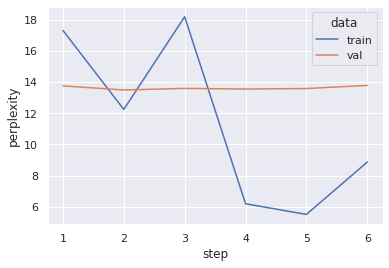

<Figure size 432x288 with 0 Axes>

In [58]:
ea_global.plot_metric_hist("perplexity")

In [49]:
result_dir = os.path.join(base_result_dir, "debug/sw_deterministic_test_5/42")
ea_sw = ExpAnalyzer(result_dir)

In [50]:
ea_sw.train_hist_df

,step,data,loss,perplexity
0,1,train,2.851500,17.313733
1,2,train,2.505000,12.243559
2,3,train,2.900800,18.188691
3,4,train,1.823200,6.191640
4,5,train,1.706300,5.508542
5,6,train,2.182300,8.866676
6,1,val,2.621380,13.754696
7,2,val,2.602014,13.490876
8,3,val,2.609457,13.591675
9,4,val,2.606499,13.551530


In [51]:
ea_sw.author_result_df.mean()

loss           2.738543
perplexity    18.067263
dtype: float64

In [52]:
ea_sw.author_result_df.std()

loss           0.506300
perplexity    14.205811
dtype: float64

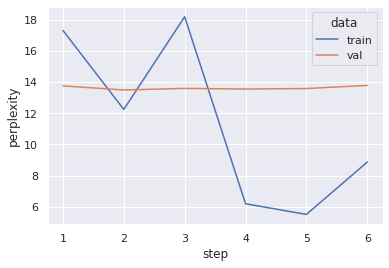

<Figure size 432x288 with 0 Axes>

In [53]:
ea_sw.plot_metric_hist("perplexity")

In [61]:
result_dir = os.path.join(base_result_dir, "debug/sw_deterministic_test_9/42")
ea_sw9 = ExpAnalyzer(result_dir)

In [62]:
ea_sw9.train_hist_df

,step,data,loss,perplexity
0,1,train,0.316800,1.372728
1,2,train,1.619100,5.048545
2,3,train,1.538600,4.658064
3,4,train,0.205600,1.228262
4,5,train,1.025900,2.789605
5,6,train,0.960900,2.614048
6,1,val,2.621380,13.754696
7,2,val,2.610982,13.612408
8,3,val,2.640493,14.020113
9,4,val,2.640336,14.017910


In [63]:
ea_sw9.author_result_df.mean()

loss           2.751878
perplexity    18.370296
dtype: float64

In [64]:
ea_sw9.author_result_df.std()

loss           0.510126
perplexity    14.795968
dtype: float64

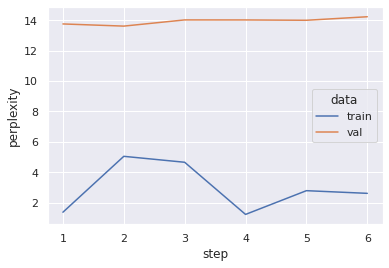

<Figure size 432x288 with 0 Axes>

In [65]:
ea_sw9.plot_metric_hist("perplexity")

In [44]:
result_dir = os.path.join(base_result_dir, "debug/sw_deterministic_test_1/42")
ea_sw1 = ExpAnalyzer(result_dir)

In [45]:
ea_sw1.train_hist_df

,step,data,loss,perplexity
0,1,train,0.000000,1.000000
1,2,train,1.732200,5.653077
2,3,train,1.383700,3.989636
3,4,train,0.000000,1.000000
4,5,train,0.962200,2.617449
5,6,train,0.747700,2.112137
6,1,val,2.860363,17.467875
7,2,val,2.680884,14.597994
8,3,val,2.638724,13.995332
9,4,val,2.673349,14.488408


In [46]:
ea_sw1.author_result_df.mean()

loss           2.785843
perplexity    18.994905
dtype: float64

In [47]:
ea_sw1.author_result_df.std()

loss           0.509931
perplexity    15.385457
dtype: float64

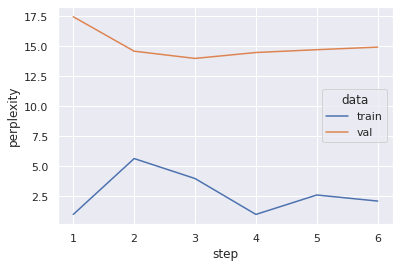

<Figure size 432x288 with 0 Axes>

In [48]:
ea_sw1.plot_metric_hist("perplexity")

In [36]:
result_dir = os.path.join(base_result_dir, "debug/finetune_author_deterministic_test/42")
ea_author = ExpAnalyzer(result_dir)

In [37]:
ea_author.train_hist_df

,step,data,loss,perplexity
0,1,train,3.153300,23.413201
1,2,train,2.205300,9.072973
2,1,val,2.652246,14.185871
3,2,val,2.659763,14.292903


In [42]:
ea_author.author_result_df.mean()

loss           2.767966
perplexity    18.797044
dtype: float64

In [43]:
ea_author.author_result_df.std()

loss           0.517560
perplexity    15.762677
dtype: float64

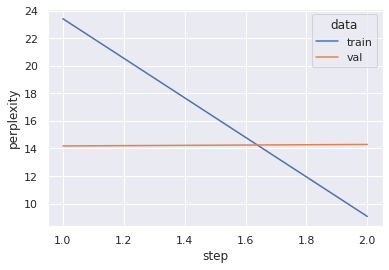

<Figure size 432x288 with 0 Axes>

In [38]:
ea_author.plot_metric_hist("perplexity")